# **🦎 CLV Prediction for Customer Retention Strategy Optimization**

## **Business problem**
Insurance companies have very limited budget for marketing. Optimization needs to be done on customer retention campaign/strategies to prioritize maintaining valuable customers. Customer Lifetime Value (CLV) can be used to allocate marketing budget to customers that will bring the highest revenue.

**Goal**: Determine customer's lifetime value using their profile data to identify high-value customers.\
**Analytical Approach**: Develop an accurate regression model trained using historical customer profile data to predict Customer Lifetime Value.

### **Objectives**
1. Develop a machine learning model that accurately predicts CLV using available customer features.
2. Map out feature importance to explain which features afffect CLV the most and how they can guide business actions.

### **Deliverables**
1. Notebook (eda, cleaning/preprocessing, feature engineering/selection, modelling, evaluation)
2. Slide deck
3. streamlit prototype
4. github README and reproducability tutorial

----

## **Mock-Case Study**
**GAICO** is a leading American vehicle insurance company offering a range of auto coverage products across multiple customer segments. In 2019, GAICO's marketing team launched a campaign to improve customer retention and optimize marketing budget by identifying high-value customers that generate higher lifetime revenue and are more likely to stay with GAICO. They tasked the analytics team to develop a predictive model for Customer Lifetime Value (CLV) using historical customer profile data.

**Stakeholder**: GAICO's Marketing team\
**My Role**: GAICO Analytics team

----

### **Metric Selection**
- **RMSE (Root Mean-Squared Error)**: Good to evaluate models that wants to achieve high accuracy. A good fit for financial, pricing, forecasting contexts.
- **R^2**: Captures proportion of variance
- **MAPE (Mean Absolute Percentage Error)**: Easily interpretable percentage metric for stakeholders.

### **Data Dictionary**
Data used is a customer profile data from an American vehicle insurance company in 2019. One row represents a single customer.

| Feature | Type | Description 
|---|---|---|
| Vehicle Class | Categorical (Nominal) | Type of vehicle insured. |
| Coverage | Categorical (Ordinal) | Coverage tiers ("Basic", "Extended", "Premium"). |
| Renew Offer Type | Categorical (Nominal) | Type of renewal offer presented. |
| EmploymentStatus | Categorical (Nominal) | Customer's employment status (“Employed”, "Medical Leave", “Unemployed”, “Retired”, “Disabled”). |
| Marital Status | Categorical (Nominal) | Customer's status (“Married”, “Single”, “Divorced”). |
| Education | Categorical (Ordinal) |Educational background ("Highschool or below", "College", "Bachelor", "Master", "Doctor"). |
| Number of Policies | Numerical (Float) | Number of active insurance policies the customer holds. |
| Monthly Premium Auto | Numerical (Float) | The amount the customer pays monthly for auto insurance in USD. |
| Total Claim Amount | Numerical (Float) | The total dollar amount of claims made by the customer in USD. |
| Income | Numerical (Float) | Customer's annual income in USD |
| Customer Lifetime Value | Numerical (Float) | Target value. Projected total revenue a customer will bring in USD. |

#### **Import Libraries and Data**

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split

# binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial
from sklearn.preprocessing import PolynomialFeatures

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_validate

# model
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# scoring
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from skrub.datasets import fetch_employee_salaries

#skrub auto eda
from skrub import TableReport

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

import time

from sklearn.metrics import make_scorer, mean_absolute_percentage_error

#FEATURE IMPORTANCE
import shap

#LEARNING CURVE
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import pickle

In [ ]:
#import data
dir = r"PATH\TO\YOUR\DIR
df = pd.read_csv(dir)

df.head(10)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
5,SUV,Basic,Offer2,Employed,Married,Bachelor,8.0,107.0,85.063708,94389.0,8649.700578
6,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,101.0,584.567645,25419.0,12052.984090
7,Four-Door Car,Basic,Offer2,Employed,Married,College,1.0,66.0,144.987956,26477.0,2621.116054
8,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,5.0,65.0,264.563772,36615.0,5243.828046
9,Four-Door Car,Premium,Offer3,Employed,Divorced,College,3.0,117.0,582.781896,59624.0,9156.322563


### **Initial Exploratory Data Analysis (EDA)**

Figure out data types, their dimensions, and identify missing values & duplicates.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [73]:
df.describe(include="all")

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669,5669,5669,5669,5669,5669,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2858,3477,2292,3541,3305,1703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,109.000000,549.986128,62464.000000,9031.214859


#### **Duplicated Values Treatment**
Removing duplicated values is difficult when we have implemented pipelines later on, so we will handle them now.

In [74]:
#TOTAL DUPLICATED COLUMNS
print(f"Amount of duplicated rows:", df.duplicated().sum())

Amount of duplicated rows: 618


In [75]:
#SHOW DUPLICATED COLUMNS IN DF
df[df.duplicated() == True]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


618 rows of duplicates are found. One row represents a single customer so duplicates are not allowed. We will remove these rows.

In [76]:
#DROP DUPLICATED COLUMNS EARLY
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [77]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


618 rows of duplicated values removed.

#### **Missing Values Identification**
If present, missing values will be handled using imputer inside the pipeline later. We will identify them for now.

In [78]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

No missing value found.

## **Exploratory Data Analysis (EDA)**


In [79]:
#AUTOEDA USING SKRUB
TableReport(df)

Processing column  11 / 11


,,,,,,,,,,,


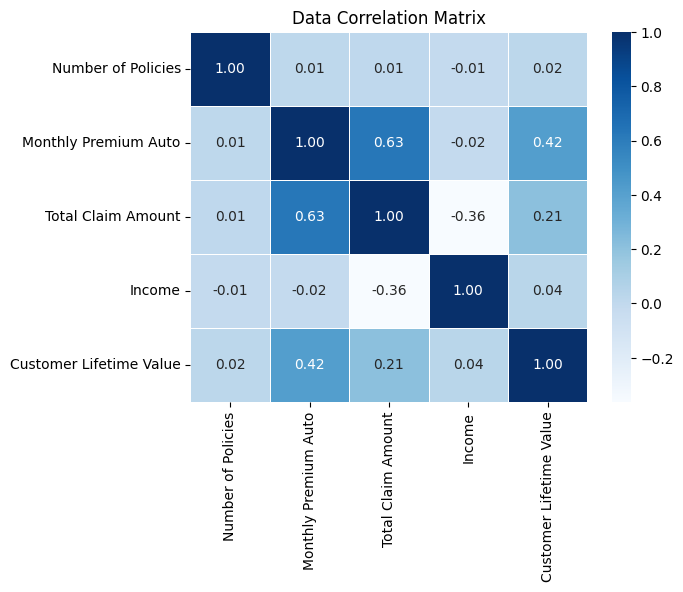

In [80]:
#CORRELATION MATRIX
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Data Correlation Matrix")
plt.show()

Correlations
- EmploymentStatus is highly overall correlated with Income.
- Income is highly overall correlated with EmploymentStatus
- Monthly Premium Auto is highly overall correlated with Total Claim Amount and Vehicle Class.
- Besids Monthly Premium Auto and Total Claim Amount, correlation of anything else with CLV is **pretty small**.

General Insights
- Four-door car is the most commonly insured vehicle.
- Customer base prefers the basic coverage, most likely due to its price.
- Hypothesis: Since Offer4 is the rarest type, it is catered towards highest CLV customers.
- Most customers are employed, married, and have a bachelors degree

### **Numerical Feature EDA**

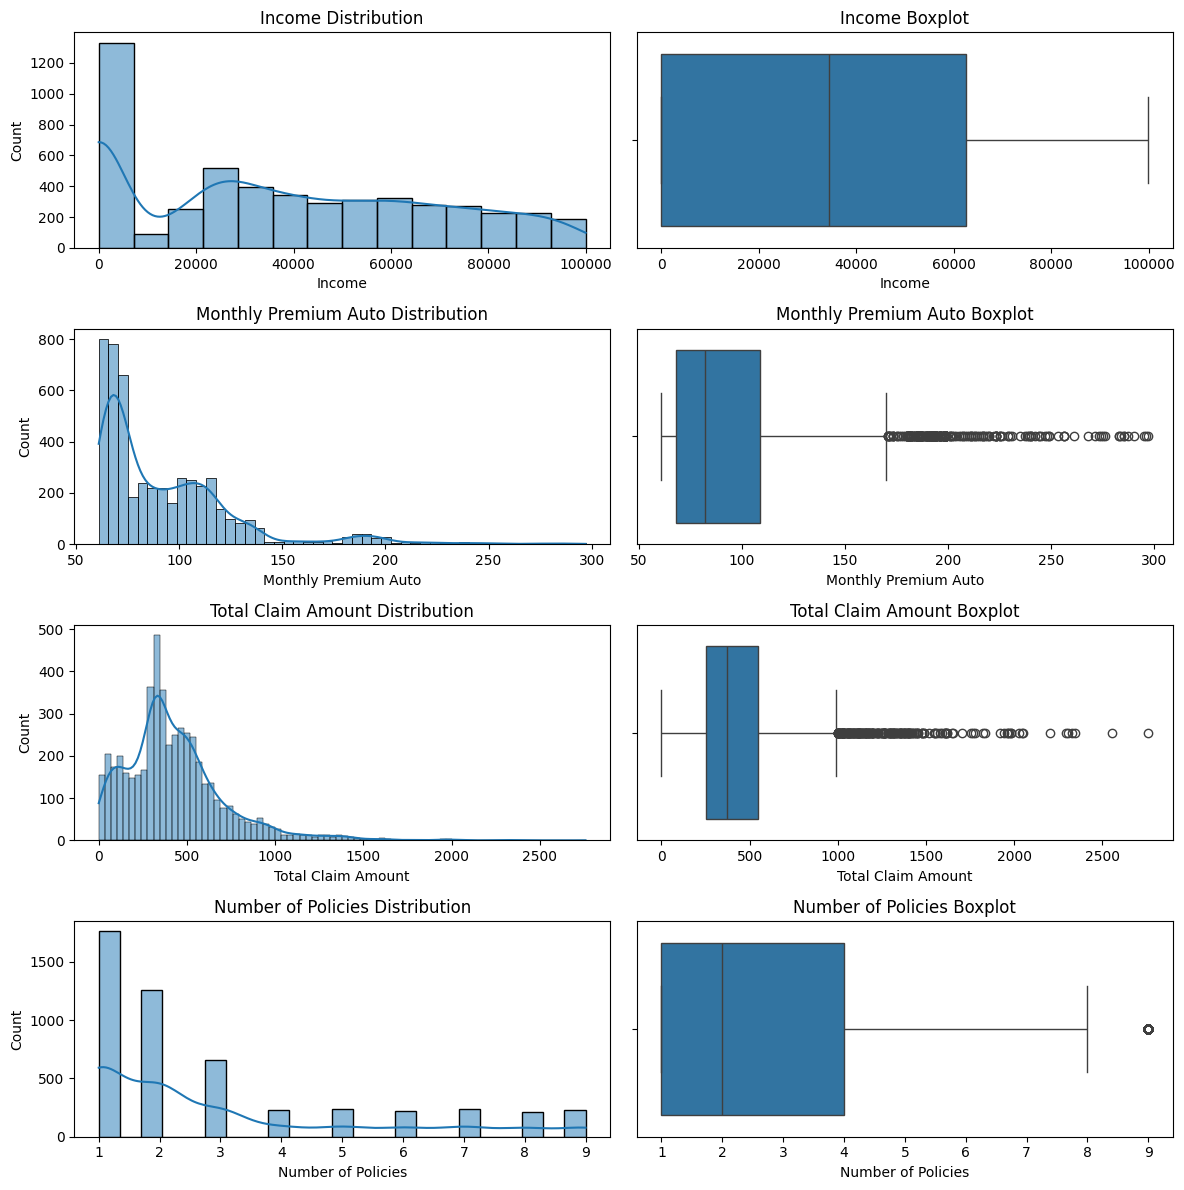

In [81]:
#COLUMNS
cols = ["Income", "Monthly Premium Auto", "Total Claim Amount", "Number of Policies"]

#PLOT
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, col in enumerate(cols):
    #histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution")

    #boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

- Income seems to be capped at **US$100000**.
- Income has a lot of 0 value. This is explained by the presence of **"Unemployed" employment status**.
- All the other numerical features are **positively skewed** with some outliers beyond their upper boundaries.

Outlier treatment and detection will be performed later on **Data Preprocessing**.

#### **Correlation of Numerical features vs CLV**

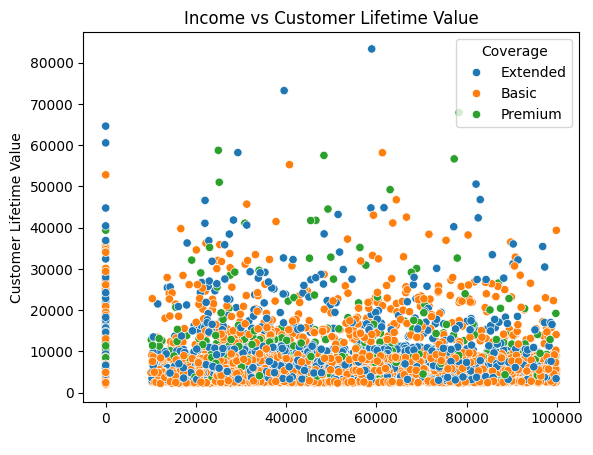

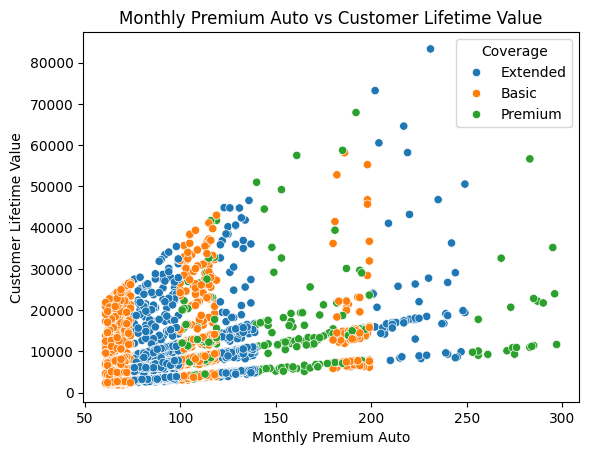

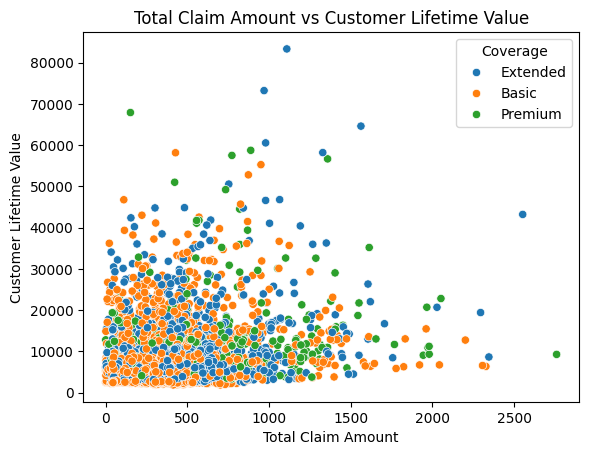

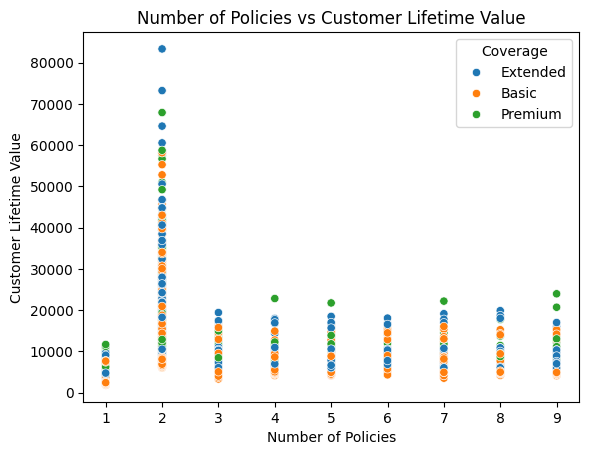

In [82]:
for col in cols:
    sns.scatterplot(data=df, x=col, y="Customer Lifetime Value", hue="Coverage")
    plt.title(f"{col} vs Customer Lifetime Value")
    plt.show()

- **No significant** correlation found between Income vs CLV.
- **Positive correlation** visible between Monthly Premium Auto vs CLV. Premmiums are indeed the main way car insurance companies make revenue.
- Clear **coverage pricing patterns** are also visible across the premium, indicating each coverage plans have different set price rules.
- **No significant** correlation found between Total Claim Amount vs CLV, but **Extended and Premium** coverage is found more on higher CLV & Total Claim Amount.
- Most customers have **2 active insurance policies.**

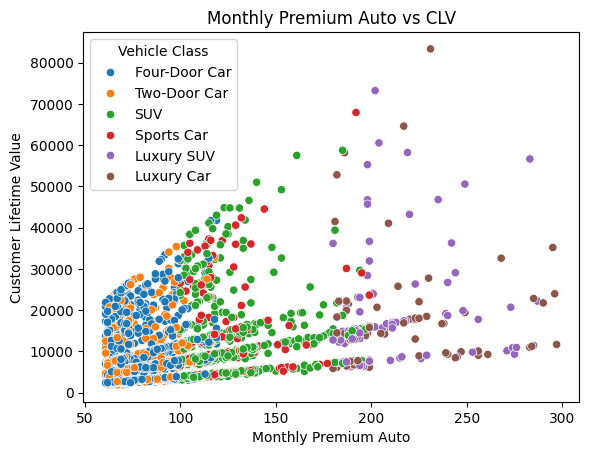

In [83]:
sns.scatterplot(data=df, x="Monthly Premium Auto", y="Customer Lifetime Value", hue="Vehicle Class")
plt.title("Monthly Premium Auto vs CLV")
plt.show()

- **Four-door cars** have a premium of around US$60-100
- **Two-door cars** have a premium of around US$60-110
- **SUV and Sports Car** have a premium of around US$100-180
- **Luxury SUV and Cars** have a premium of around US$180-270

### **Categorical Feature EDA**

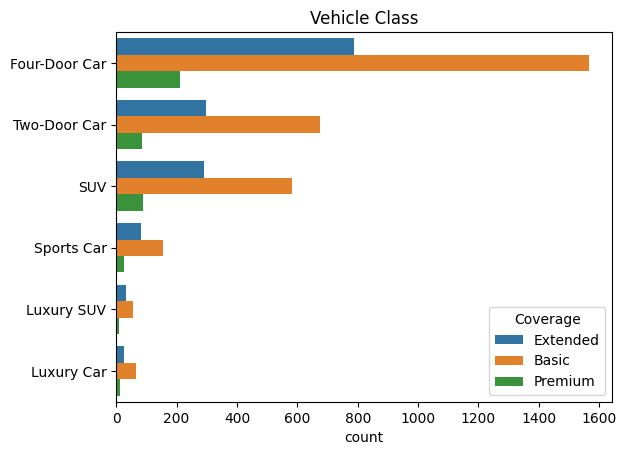

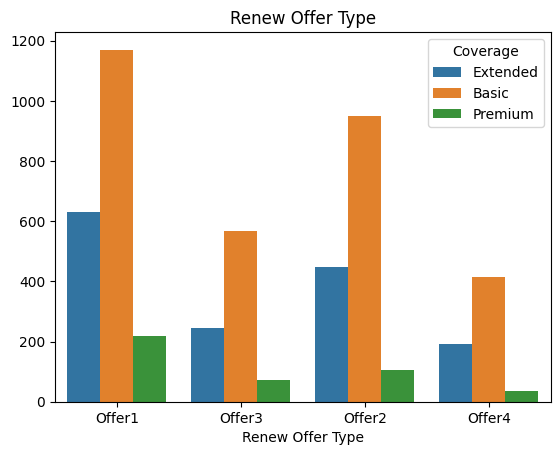

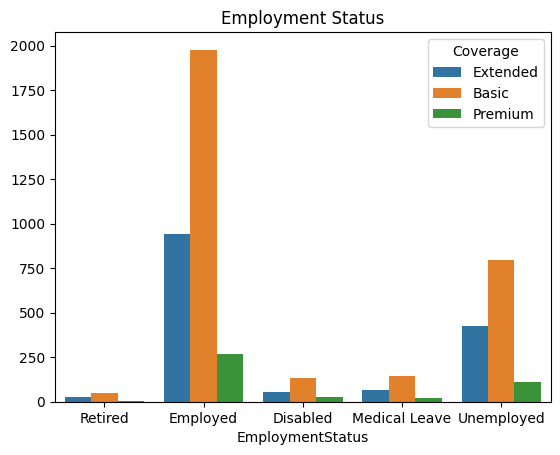

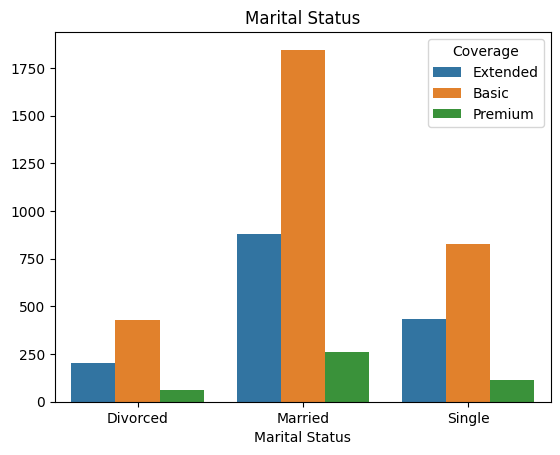

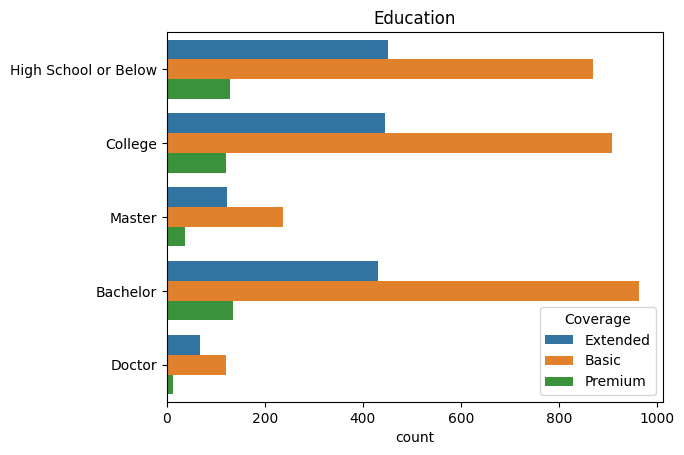

In [84]:
#VEHICLE CLASS COUNT
sns.countplot(data=df, y="Vehicle Class", hue="Coverage")
plt.ylabel("")
plt.title("Vehicle Class")
plt.show()

#RENEW OFFER TYPE COUNT
sns.countplot(data=df, x="Renew Offer Type", hue="Coverage")
plt.ylabel("")
plt.title("Renew Offer Type")
plt.show()

#EMPLOYMENT STATUS COUNT
sns.countplot(data=df, x="EmploymentStatus", hue="Coverage")
plt.ylabel("")
plt.title("Employment Status")
plt.show()

#MARITAL STATUS COUNT
sns.countplot(data=df, x="Marital Status", hue="Coverage")
plt.ylabel("")
plt.title("Marital Status")
plt.show()

#EDUCATION LEVEL COUNT
sns.countplot(data=df, y="Education", hue="Coverage")
plt.ylabel("")
plt.title("Education")
plt.show()

- Most customers deem **the "Basic" coverage more than enough**, because even more expensive car types (Sports car, Luxury SUV/car) still use the basic plan
- Basic coverage is the **most common** across the different offers.
- Most customers are employed, and inactive employment status (retired, disabled, medical leave) are a lot **less likely** to use the higher tier coverage.
- All the different marital status still significantly prefer the basic coverage.
- Majority of the customer base have a bachelor's degree.

### **Customer Lifetime Value / Target EDA**
Thorough understanding of the target value is important to determine feature engineering and outlier detection for this column later.

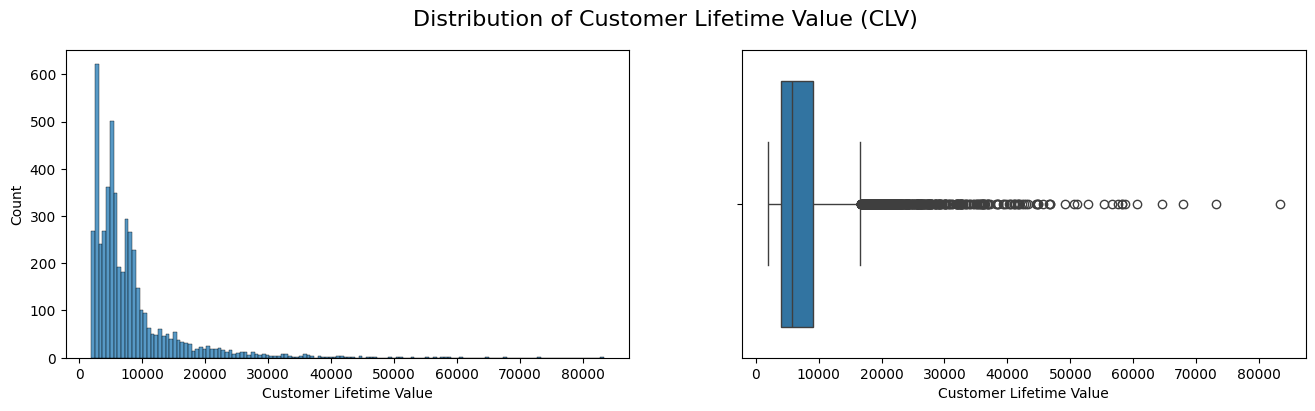

In [85]:
plt.figure(figsize=(16,4))
plt.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value')

plt.show()

In [86]:
df["Customer Lifetime Value"].describe()

count     5051.000000
mean      8059.483178
std       6989.189674
min       1898.007675
25%       3964.441004
50%       5837.528088
75%       9028.564632
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

CLV is greatly right skewed. Everything above the upper boundary can be considered extreme values. However, any CLV value can have a valid justification. Further outlier treatment will be done later.

## **Data Preprocessing**

### **Outlier Treatment**

In [ ]:
#CREATE AN OUTLIER DETECTION FUNCTION
def outlier_detection(data):
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    iqr = q3 - q1

    print(f'IQR Value {data}: {iqr}')

    ub = q3 + iqr * 1.5
    lb = q1 - iqr * 1.5
    
    print(f'Upper bound value: {ub}')
    print(f'Lower bound value: {lb}')

    outliers = df[(df[data] > ub) | (df["Customer Lifetime Value"] < lb)]
    print(f"Number of {data} outliers: {len(outliers)}")
    

In [88]:
#OUTLIER CLV
outlier_detection("Customer Lifetime Value")

IQR Value Customer Lifetime Value: 5064.1236284999995
Upper bound value: 16624.75007525
Lower bound value: -3631.744438749999
Number of Customer Lifetime Value outliers: 449


#### **CLV Outlier**

Before we deal with the outlier we need to understand how CLV is calculated in the context of auto insurance companies. Roughly, they can be explained as follows:

$$
\text{CLV} \approx \sum_{t=0}^{T-1} \frac{(\text{Premium}_t - \text{Claim}_t - \text{Admin}_t)}{(1 + r)^t} - AC
$$

It is the sum of **net annual profit** (Premiums - Claims - Admin over the money discount factor) **multiplied by tenure** minus the acquisition cost. Sadly, our data **does not include customer tenure length** which makes the CLV more unreliable (We dont know how long the customer has used out product) especially for really high CLV customers. We also **can't calculate net annual profit** since we dont have annual mean/median claim amount, only TOTAL claim amount of that customer. To help model performance, we need to remove the majority of significant CLV outliers.


Any values are mathematically valid. We will inspect extremely high CLV values (> US$30000) to analyze further.

In [89]:
df[df["Customer Lifetime Value"] > 30000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
76,Sports Car,Premium,Offer3,Employed,Single,High School or Below,2.0,144.0,820.431905,49259.0,44520.13577
114,SUV,Premium,Offer2,Employed,Married,College,2.0,161.0,772.800000,48367.0,57520.50151
199,Luxury Car,Extended,Offer2,Employed,Married,College,2.0,209.0,1003.200000,21988.0,41075.42879
235,Luxury SUV,Premium,Offer4,Employed,Married,College,2.0,283.0,1358.400000,77237.0,56675.93768
266,SUV,Basic,Offer1,Employed,Single,Master,2.0,119.0,571.200000,66661.0,42561.63183
...,...,...,...,...,...,...,...,...,...,...,...
5358,SUV,Basic,Offer2,Employed,Single,Bachelor,2.0,109.0,243.467617,90607.0,30718.81240
5385,SUV,Extended,Offer1,Unemployed,Single,College,2.0,133.0,638.400000,0.0,36897.79765
5415,Sports Car,Extended,Offer4,Employed,Married,High School or Below,2.0,129.0,619.200000,31267.0,40636.66734
5502,SUV,Basic,Offer1,Employed,Married,Bachelor,2.0,108.0,225.971279,24626.0,30081.36783


- Almost all vehicles insured by these high CLV customers are expensive, luxury cars (Luxury SUV, Luxury Car, Sports Car) **(Justified ✅)**
- Most insured vehicles in this segment are under Extended or Premium coverage, indicating wealthy customer segment. **(Justified ✅)**
- Most customers in this segment at least finished college or have a bachelor's degree. **(Justified ✅)**
- Though some are just high school graduates, 5% of all US millionaires only graduated highschool. Makes their presence here plausible **(Justified ✅)**
- Most customers in this segment has "Monthly Premium Auto" and "Total Claim Amount" near or above its upper boundary as well (refer to the Numerical Feature EDA), once again indicating wealthy customer segment. **(Justified ✅)**

However, since we cant correlate their high CLV values with their tenure duration, these data will GREATLY skew our regression model. We will **EXCLUDE all data with CLV above US$30000.**

In [91]:
#CUSTOMERS WITH CLV > USD30000
df = df[df["Customer Lifetime Value"] <= 30000]

print("Remaining rows:", len(df))

Remaining rows: 4950


We will also inspect all **unemployed customers with 0 income.**

In [92]:
print("Total unemployed customers:", len(df[df["EmploymentStatus"] == "Unemployed"]))
print("Total customers with 0 income:", len(df[df["Income"] == 0]))
print("Total unemployed customers with 0 income:", len(df[(df["EmploymentStatus"] == "Unemployed") & (df["Income"] == 0)]))


Total unemployed customers: 1313
Total customers with 0 income: 1313
Total unemployed customers with 0 income: 1313


We can confirm that there are no errors that cause 0 income. All customers with 0 income is **Unemployed.** It is still possible that they have value to the company, but they are unlikely to have a very big CLV. We will identify unemployed customers with 0 income that has a CLV greater than the upper boundary (USD 16625).

In [93]:
df[(df["Customer Lifetime Value"] > 16625) & (df["EmploymentStatus"] == "Unemployed") & (df["Income"] == 0)]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
283,Two-Door Car,Basic,Offer3,Unemployed,Single,Bachelor,2.0,73.0,350.400000,0.0,20766.66918
286,Four-Door Car,Extended,Offer2,Unemployed,Married,High School or Below,2.0,82.0,588.269018,0.0,21172.38983
333,Four-Door Car,Basic,Offer2,Unemployed,Single,Bachelor,2.0,70.0,491.112176,0.0,19511.99782
423,Four-Door Car,Extended,Offer3,Unemployed,Single,High School or Below,2.0,93.0,669.600000,0.0,20534.39224
428,SUV,Basic,Offer1,Unemployed,Married,College,2.0,102.0,489.600000,0.0,22103.50720
...,...,...,...,...,...,...,...,...,...,...,...
5257,Four-Door Car,Basic,Offer3,Unemployed,Single,Bachelor,2.0,72.0,345.600000,0.0,19504.47390
5317,SUV,Basic,Offer3,Unemployed,Divorced,High School or Below,2.0,107.0,513.600000,0.0,29412.28930
5506,Sports Car,Basic,Offer3,Unemployed,Single,High School or Below,2.0,111.0,900.145260,0.0,18767.55161
5566,Two-Door Car,Extended,Offer1,Unemployed,Single,High School or Below,2.0,89.0,538.689882,0.0,24258.71383


These customers, though technically possible, will greatly skew and ruin the model. **We will drop all these customers as well.**

In [94]:
#CUSTOMERS THAT ARE UNEMPLOYED WITH 0 INCOME AND CLV > UPPER BOUNDARY
df = df[~((df["Customer Lifetime Value"] > 16625) & (df["EmploymentStatus"] == "Unemployed") & (df["Income"] == 0))]

print("Remaining rows:", len(df))

Remaining rows: 4855


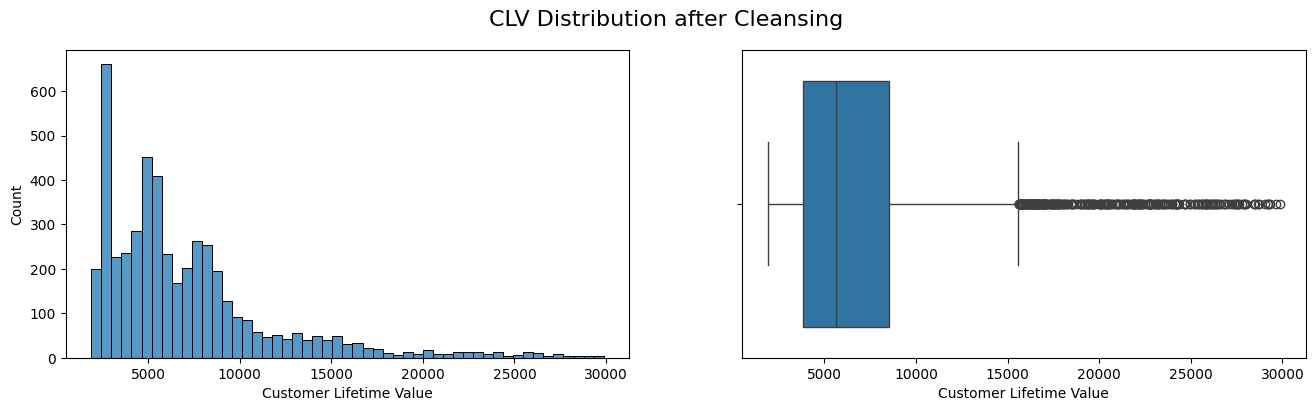

In [111]:
plt.figure(figsize=(16,4))
plt.suptitle('CLV Distribution after Cleansing', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value')

plt.show()

### **Income Outlier**

In [38]:
#OUTLIER INCOME
outlier_detection("Income")

IQR Value Income: 62956.0
Upper bound value: 157390.0
Lower bound value: -94434.0
Number of Income outliers: 0


Any positive income value is technically possible. Unrealistic income cases have been previously handled (Extreme CLV, but unemployed with 0 income). Nothing dropped here.

#### **Monthly Premium Auto Outlier**

In [95]:
#OUTLIER MONTHLY PREMIUM AUTO
outlier_detection("Monthly Premium Auto")

IQR Value Monthly Premium Auto: 39.0
Upper bound value: 165.5
Lower bound value: 9.5
Number of Monthly Premium Auto outliers: 222


According to [Zebra State of Auto Insurance Report 2019](https://share.google/8JCBqFZYolpcsQy7l), the highest annual auto insurance premium is held by the state of Michigan at US$2693, which is roughly US$224.42 a month (Page 12). We will use this as the extreme boundary, and remove any values above it.

In [96]:
print("Premiums above the extreme:", len(df[df["Monthly Premium Auto"] > 224.42]))

Premiums above the extreme: 34


In [98]:
df = df[~(df["Monthly Premium Auto"] > 224.42)]

#SANITY CHECK
print(df["Monthly Premium Auto"].max())
print("Remaining rows:", len(df))

223.0
Remaining rows: 4821


Now premium maximum value is < US$224.42. **34 rows dropped.**

#### **Total Claim Amount Outlier**

In [99]:
#OUTLIER TOTAL CLAIM AMOUNT
outlier_detection("Total Claim Amount")

df["Total Claim Amount"].describe()

IQR Value Total Claim Amount: 291.938624
Upper bound value: 975.507936
Lower bound value: -192.24656000000002
Number of Total Claim Amount outliers: 179


count    4821.000000
mean      414.516112
std       270.423597
min         0.423310
25%       245.661376
50%       365.820487
75%       537.600000
max      2327.166394
Name: Total Claim Amount, dtype: float64

Referring to [2021/2022 NAIC Auto Insurance Database Report](https://share.google/bN1FOjnhJbIiQ4JfP) (which contains data from 2019 as well) a mean of US$416 and median of US$368 would be minor to moderate accident claims. This excludes the more expensive severe accidents/total loss. So all values are valid, **no rows will be dropped**

#### **Number of Policies Outlier**

In [100]:
#OUTLIER NUMBER OF POLICIES
outlier_detection("Number of Policies")

IQR Value Number of Policies: 3.0
Upper bound value: 8.5
Lower bound value: -3.5
Number of Number of Policies outliers: 226


Any positive number of policies are technicially possible. **No rows will be dropped.**

In [101]:
df.describe(include="all")

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4821,4821,4821,4821,4821,4821,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2511,3005,1898,3090,2882,1468,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.030699,90.544908,414.516112,38368.169467,7083.334908
std,NaN,NaN,NaN,NaN,NaN,NaN,2.421526,30.020980,270.423597,30563.654738,4753.910636
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,245.661376,0.000000,3824.431298
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,80.000000,365.820487,35149.000000,5638.262608
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,107.000000,537.600000,62935.000000,8535.108303


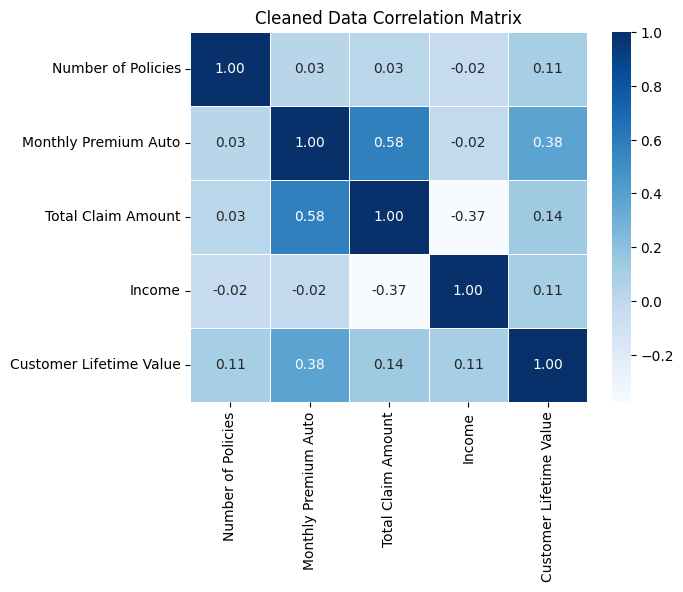

In [102]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Cleaned Data Correlation Matrix")
plt.show()

- 4821 rows remaining after cleansing.
- Correlation of Number of Policies and income increased.
- Correlation of Monthly Premium Auto and Total Claim Amount slightly decreased.

### Save cleaned data separately

In [180]:
df.to_csv("customer_lifetime_value_CLEANED.csv", index=False)

### **Test/Train Splitting**

In [103]:
X = df.drop(columns=["Customer Lifetime Value"]) 
y = df["Customer Lifetime Value"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #Regression, no stratify required.
) 

### **Feature Engineering Pipeline**

In [105]:
num_cols = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
cat_binary = ["Vehicle Class"]
cat_ordinal = ["Coverage", "Education"]
cat_onehot = ["Renew Offer Type", "EmploymentStatus", "Marital Status"]

#### **Column Transformer**
- No missing values found. **No imputing required**.
- Data is continuous and **does not require binning** at this point.

Categorical
- Vehicle Class, > 5 unique values = **Binary Encoding**
- Coverage, is ordinal data = **Ordinal Encoding**
- Renew Offer Type, < 5 unique values = **One-hot Encoding**
- EmploymentStatus, not distinctly ordinal and < 5 unique values = **One-hot Encoding**
- Marital Status, not distinctly ordinal and < 5 unique values = **One-hot Encoding**
- Education = **Ordinal Encoding**

Numerical
- Number of Policies, some extreme outliers = **Robust Scaler**
- Monthly Premium Auto, a lot of extreme outliers = **Robust Scaler**
- Total Claim Amount, a lot of extreme outliers = **Robust Scaler**
- Income, zero-heavy data = **Robust Scaler**

In [106]:
#DEFINE ORDINAL MAPPING
coverage_mapping = {
    "Basic": 1,
    "Extended": 2,
    "Premium": 3
}

education_mapping = {
    "High School or Below": 1,
    "College": 2,
    "Bachelor": 3,
    "Master": 4,
    "Doctor": 5
}

#DEFINE EACH TRANSFORMERS
binary_tf = BinaryEncoder()
ordinal_tf = OrdinalEncoder()
onehot_tf = OneHotEncoder(drop="first")
num_tf = RobustScaler()


In [161]:
#FULL PREPROCESSOR (SCALED)
preprocessor_scaled = ColumnTransformer(transformers=[
        ("num", num_tf, num_cols), 
        ("binary", binary_tf, cat_binary),
        ("onehot", onehot_tf, cat_onehot),
        ("ordinal", ordinal_tf, cat_ordinal)
])

#FULL PREPROCESSOR (UNSCALED)
preprocessor_unscaled = ColumnTransformer(transformers=[
        ("num", "passthrough", num_cols), 
        ("binary", binary_tf, cat_binary),
        ("onehot", onehot_tf, cat_onehot),
        ("ordinal", ordinal_tf, cat_ordinal)
])

### **Feature Selection**


- No duplicated, missing value, and significantly low variance features to remove.
- Data wise, 10 feature columns are an appropriate amount. Not too much (> 25) or to few (< 5).
- From a business domain perspective, all of the feature columns are relevant for a regression model determining the target.

We will used a model-based feature selection by fitting the transformed features into a lasso model and finding each feature's coefficient. This process is done manually outside of the pipeline.

In [108]:
#USE ENCODED FEATURES
X_train_encoded = preprocessor_scaled.fit_transform(X_train)

In [109]:
lasso = Lasso(alpha=0.001, random_state=42) #alpha comes from experimentation
lasso.fit(X_train_encoded, y_train)

,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [110]:
feature_names = []
for name, transformer, cols in preprocessor_scaled.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

# Coefficients dataframe
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lasso.coef_
})

print(coef_df)

                           Feature  Coefficient
0               Number of Policies   532.234865
1             Monthly Premium Auto  2565.531855
2               Total Claim Amount  -326.194943
3                           Income   160.676087
4                  Vehicle Class_0  -261.795758
5                  Vehicle Class_1  -164.914315
6                  Vehicle Class_2  -131.916145
7          Renew Offer Type_Offer2  -565.710431
8          Renew Offer Type_Offer3  -263.939427
9          Renew Offer Type_Offer4  -932.895164
10       EmploymentStatus_Employed   717.961150
11  EmploymentStatus_Medical Leave   967.728002
12        EmploymentStatus_Retired  1458.348471
13     EmploymentStatus_Unemployed  -594.280797
14          Marital Status_Married   256.381734
15           Marital Status_Single   396.564463
16                        Coverage    39.852185
17                       Education   130.996899


We can ignore the negative values and only consider the coefficient amount.

- All numerical features are significant.
- Average coefficient values of the categorical fatures show that Coverage (39.852) and Education (130.996) are the least significant features. This result seem unreliable since coverage is one of the most important features. 

We decided to **keep all the features** since each one still carry a measurable significance to the target and are relevant according to our domain knowledge.

## **Modeling**

### **Benchmark Model Selection**
We will select our benchmark model from a couple of chosen models. Each of them will be evaluated using Cross-validation. Best performing model will be selected.

In [112]:
?TransformedTargetRegressor

Init signature:
TransformedTargetRegressor(
    regressor=None,
    *,
    transformer=None,
    func=None,
    inverse_func=None,
    check_inverse=True,
)
Docstring:     
Meta-estimator to regress on a transformed target.

Useful for applying a non-linear transformation to the target `y` in
regression problems. This transformation can be given as a Transformer
such as the :class:`~sklearn.preprocessing.QuantileTransformer` or as a
function and its inverse such as `np.log` and `np.exp`.

The computation during :meth:`fit` is::

    regressor.fit(X, func(y))

or::

    regressor.fit(X, transformer.transform(y))

The computation during :meth:`predict` is::

    inverse_func(regressor.predict(X))

or::

    transformer.inverse_transform(regressor.predict(X))

Read more in the :ref:`User Guide <transformed_target_regressor>`.

.. versionadded:: 0.20

Parameters
----------
regressor : object, default=None
    Regressor object such as derived from
    :class:`~sklearn.base.RegressorMixin`. 

In [ ]:
#DEFINE LOG TRANSFORMER
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1) #log-transforms skewed, target value for better fitting. When fitting is done, it will be inversed back.

In [114]:
#MODELS THAT USE SCALING
linreg = TransformedTargetRegressor(
    regressor=Ridge(alpha=10),
    transformer=log_transformer
)

knn = TransformedTargetRegressor(
    regressor=KNeighborsRegressor(),
    transformer=log_transformer
)

#MODELS THAT DONT USE SCALING
decision_tree = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(random_state=42),
    transformer=log_transformer
)

bagging = TransformedTargetRegressor(
    regressor=BaggingRegressor(random_state=42),
    transformer=log_transformer
)

random_forest = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    transformer=log_transformer
)

adaboost = TransformedTargetRegressor(
    regressor=AdaBoostRegressor(random_state=42),
    transformer=log_transformer
) 

xgboost = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42, verbosity=0),
    transformer=log_transformer
)

gradboost = TransformedTargetRegressor(
    regressor=GradientBoostingRegressor(random_state=42),
    transformer=log_transformer
)

We used 'ridge' with alpha = 10 at our linear regression model. Ridge is used instead of lasso because we found that all features are significant. Alpha value found from manually experimenting with values (0.01, 0.1, 1, 10) until we found the best.

Other models do not have any coefficients to regularize, so no other models will use 'ridge'.

In [115]:
list_model_scaled = [linreg, knn]
list_model_unscaled = [decision_tree, bagging, random_forest, adaboost, xgboost, gradboost]
list_model_name = []

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2',
    'mape': mape_scorer
}

list_all_score = []
list_mean_score = []
list_std = []

In [116]:
#TO GET MODEL NAME FOR DF
def get_model_name(model):
    # Case 1: TransformedTargetRegressor wrapping another regressor
    if hasattr(model, "regressor"):
        inner = model.regressor
        # If that regressor is a pipeline, get the final step’s name
        if hasattr(inner, "steps"):
            return type(inner.steps[-1][1]).__name__
        return type(inner).__name__

    # Case 2: Pipeline directly
    elif hasattr(model, "steps"):
        return type(model.steps[-1][1]).__name__

    # Case 3: plain model
    else:
        return type(model).__name__

In [117]:
#SCALED PIPELINE
results_scaled = []

for model in list_model_scaled:
    pipe_prep_model = Pipeline([
        ('preprocessing', preprocessor_scaled),
        ('modeling', model)
    ])

    #START MEASURING TIME
    start_time = time.time()

    #CROSS-VALIDATION
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scoring,
        return_train_score=False
    )

    #STOP MEASURING TIME
    end_time = time.time()
    elapsed = end_time - start_time 

    results_scaled.append({
        "Model": get_model_name(model),
        "RMSE (mean)": -np.mean(crossval['test_rmse']),
        "R² (mean)": np.mean(crossval['test_r2']),
        "MAPE (mean)": -np.mean(crossval['test_mape']),
        "Time (s)": round(elapsed, 2)
    })

results_scaled

[{'Model': 'Ridge',
  'RMSE (mean)': np.float64(4409.828643688879),
  'R² (mean)': np.float64(0.12049795140573165),
  'MAPE (mean)': np.float64(0.3755441171708386),
  'Time (s)': 0.25},
 {'Model': 'KNeighborsRegressor',
  'RMSE (mean)': np.float64(4348.750866222781),
  'R² (mean)': np.float64(0.14642289282793433),
  'MAPE (mean)': np.float64(0.36449407132687955),
  'Time (s)': 4.03}]

In [118]:
#UNSCALED PIPELINE
results_unscaled = []

for model in list_model_unscaled:
    pipe_prep_model = Pipeline([
        ('preprocessing', preprocessor_unscaled),
        ('modeling', model)
    ])

    #START MEASURING TIME
    start_time = time.time()

    #CROSS-VALIDATION
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scoring  # RMSE (lower is better)
    )
    
    #STOP MEASURING TIME
    end_time = time.time()
    elapsed = end_time - start_time 
 
    results_scaled.append({
        "Model": get_model_name(model),
        "RMSE (mean)": -np.mean(crossval['test_rmse']),
        "R² (mean)": np.mean(crossval['test_r2']),
        "MAPE (mean)": -np.mean(crossval['test_mape']),
        "Time (s)": round(elapsed, 2)
    })

results_unscaled

[]

In [119]:
df_result = pd.DataFrame(results_scaled + results_unscaled).sort_values(by="RMSE (mean)").reset_index(drop=True)

df_result

,Model,RMSE (mean),R² (mean),MAPE (mean),Time (s)
0,GradientBoostingRegressor,2336.450145,0.752758,0.076426,2.42
1,RandomForestRegressor,2355.198154,0.748951,0.075786,7.30
2,BaggingRegressor,2424.869222,0.734280,0.076609,1.08
3,XGBRegressor,2469.147860,0.724257,0.091227,0.73
4,AdaBoostRegressor,2590.363092,0.696018,0.151764,0.58
5,DecisionTreeRegressor,3259.521816,0.516723,0.105689,0.39
6,KNeighborsRegressor,4348.750866,0.146423,0.364494,4.03
7,Ridge,4409.828644,0.120498,0.375544,0.25


**Gradient Boosting** and **Random Forest**  models prove to be the best according to their scores. However Gradient Boosting is nearly three times as fast during training, which could be very valuable. We will consider this and proceed with hyperparameter tuning both models.

### **Hyperparameter Tuning**

#### **Gradient Boosting Model Tuning**

In [120]:
#GRADIENT BOOSTING PIPELINE
pipe_grad = Pipeline([
    ('preprocessing', preprocessor_unscaled),
    ('modeling', gradboost)
])

In [121]:
pipe_grad

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [122]:
?GradientBoostingRegressor

Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports mon

Make sure to include the benchmark model (default) parameter values.

In [124]:
#DEFINE HYPERPARAMETER SPACE
grad_hyperparams = {
    "modeling__regressor__n_estimators": [100, 200, 300, 400],      # Number of trees built sequentially (100 is default)
    "modeling__regressor__learning_rate": [0.1, 0.05, 0.025], # How much each tree contribute to the overall model (0.1 is default)
    "modeling__regressor__max_depth": [3, 5, 7],                 # Maximum depth of each tree (3 is default)
    "modeling__regressor__min_samples_leaf": [1, 3, 5, 10],          # Minimum samples required to be at a leaf node. (1 is default)
    "modeling__regressor__min_samples_split": [2, 5, 10, 15],       # Minimum number of samples needed to split an internal node. (2 is default)
    "modeling__regressor__subsample": [0.6, 0.8, 1.0]               # The fraction of samples used for each tree (1.0 is default)
}

1728 total possible combinations. We will set n_iter at half + 1 of this = 865

In [125]:
grad_randsearch = RandomizedSearchCV(
    estimator = pipe_grad,
    cv = KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs = -1,
    param_distributions= grad_hyperparams,
    scoring = scoring,
    n_iter = 865,
    refit = 'rmse', 
    random_state= 42
)

In [126]:
grad_randsearch.fit(X_train, y_train)

,estimator,Pipeline(step... 'expm1'>)))])
,param_distributions,"{'modeling__regressor__learning_rate': [0.1, 0.05, ...], 'modeling__regressor__max_depth': [3, 5, ...], 'modeling__regressor__min_samples_leaf': [1, 3, ...], 'modeling__regressor__min_samples_split': [2, 5, ...], ...}"
,n_iter,865
,scoring,"{'mape': make_scorer(m...hod='predict'), 'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'}"
,n_jobs,-1
,refit,'rmse'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [127]:
grad_results_df = pd.DataFrame(grad_randsearch.cv_results_)

# Select relevant columns
grad_results_clean = grad_results_df[[
    'mean_test_rmse',
    'mean_test_r2',
    'mean_test_mape',
    'mean_fit_time',       # training time
    'mean_score_time',     # prediction time
    'param_modeling__regressor__n_estimators',
    'param_modeling__regressor__learning_rate',
    'param_modeling__regressor__max_depth',
    'param_modeling__regressor__min_samples_split',
    'param_modeling__regressor__min_samples_leaf',
    'param_modeling__regressor__subsample'
]].copy()

# Convert negatives to positives
grad_results_clean['mean_test_rmse'] *= -1
grad_results_clean['mean_test_mape'] *= -1

# Add total elapsed time (fit + score)
grad_results_clean['total_time'] = grad_results_clean['mean_fit_time'] + grad_results_clean['mean_score_time']

# Sort by RMSE (lowest = best)
grad_results_clean = grad_results_clean.sort_values(by='mean_test_rmse', ascending=True).reset_index(drop=True)

grad_results_clean.head(10)

,mean_test_rmse,mean_test_r2,mean_test_mape,mean_fit_time,mean_score_time,param_modeling__regressor__n_estimators,param_modeling__regressor__learning_rate,param_modeling__regressor__max_depth,param_modeling__regressor__min_samples_split,param_modeling__regressor__min_samples_leaf,param_modeling__regressor__subsample,total_time
0,2321.632821,0.755840,0.077805,0.439407,0.015335,100,0.100,3,2,5,0.6,0.454743
1,2324.066725,0.755329,0.075784,1.711570,0.018491,400,0.025,3,10,5,0.6,1.730061
2,2324.109374,0.755441,0.079900,1.667176,0.023410,300,0.050,3,10,3,0.6,1.690586
3,2324.921417,0.755096,0.075717,1.727671,0.019391,400,0.025,3,10,10,0.6,1.747062
4,2324.921417,0.755096,0.075717,1.652282,0.018150,400,0.025,3,15,10,0.6,1.670432
5,2324.921417,0.755096,0.075717,1.858080,0.019943,400,0.025,3,5,10,0.6,1.878023
6,2324.921417,0.755096,0.075717,1.653155,0.018325,400,0.025,3,2,10,0.6,1.671480
7,2324.998952,0.755109,0.075751,1.702678,0.018371,400,0.025,3,15,5,0.6,1.721049
8,2325.163620,0.755106,0.075506,2.250696,0.019432,400,0.025,3,10,10,0.8,2.270128
9,2325.679608,0.755096,0.079855,2.080489,0.019468,300,0.050,3,2,3,0.6,2.099957


In [128]:
print("Best RMSE:", -grad_randsearch.best_score_)
print("Best Params:", grad_randsearch.best_params_)

Best RMSE: 2321.6328208985383
Best Params: {'modeling__regressor__subsample': 0.6, 'modeling__regressor__n_estimators': 100, 'modeling__regressor__min_samples_split': 2, 'modeling__regressor__min_samples_leaf': 5, 'modeling__regressor__max_depth': 3, 'modeling__regressor__learning_rate': 0.1}


####  **Best Hyperparameters - Gradient Boosting**

| Hyperparameter                      | Best Value |
|------------------------------------|-------------|
| modeling__regressor__subsample        | 0.6         |
| modeling__regressor__n_estimators     | 100         |
| modeling__regressor__min_samples_split| 2          |
| modeling__regressor__min_samples_leaf | 5           |
| modeling__regressor__max_depth        | 3           |
| modeling__regressor__learning_rate    | 0.1      |

- **RMSE (Mean)**: 2321.6328208985383
- **R-squared (Mean)**: 75.584%
- **MAPE (Mean)**: 7.78%
- **Total Time:** 0.45s

#### **Random Forest Model Tuning**

In [129]:
#RANDOM FOREST PIPELINE
pipe_rf = Pipeline([
    ('preprocessing', preprocessor_unscaled),
    ('modeling', random_forest)
])

In [130]:
pipe_rf

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [131]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [132]:
# Define hyperparameter space for Random Forest
rf_hyperparams = {
    "modeling__regressor__n_estimators": [100, 200, 400, 600],      # Number of trees built sequentially (100 is default)
    "modeling__regressor__max_depth": [10, 15, None],               # Max depth of each tree (None is default)
    "modeling__regressor__min_samples_split": [2, 10, 15, 20],   # Minimum number of samples needed to split an internal node (2 is default)
    "modeling__regressor__min_samples_leaf": [1, 3, 4, 5],          # Minimum samples required to be at a leaf node. (1 is default)
    "modeling__regressor__max_features": ['sqrt', 'log2', None],    # Number of features considered per split (None is default)
    "modeling__regressor__bootstrap": [True, False],                # Use bootstrap or not (True is default)
}

1152 possible combinations. Random forest takes roughly 3 times longer than Gradient Boost. We will fit less amount to account for that.

In [133]:
rf_randsearch = RandomizedSearchCV(
    estimator = pipe_rf,
    cv = KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs = -1,
    param_distributions= rf_hyperparams,
    scoring = scoring,
    n_iter = 577, #Half + 1 of all the possible combination.
    refit = 'rmse',  #Use RMSE
    random_state= 42
)

In [134]:
rf_randsearch.fit(X_train, y_train)

,estimator,Pipeline(step... 'expm1'>)))])
,param_distributions,"{'modeling__regressor__bootstrap': [True, False], 'modeling__regressor__max_depth': [10, 15, ...], 'modeling__regressor__max_features': ['sqrt', 'log2', ...], 'modeling__regressor__min_samples_leaf': [1, 3, ...], ...}"
,n_iter,577
,scoring,"{'mape': make_scorer(m...hod='predict'), 'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'}"
,n_jobs,-1
,refit,'rmse'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [137]:
rf_results_df = pd.DataFrame(rf_randsearch.cv_results_)

# Select relevant columns
rf_results_clean = rf_results_df[[
    'mean_test_rmse',
    'mean_test_r2',
    'mean_test_mape',
    'mean_fit_time',       # training time
    'mean_score_time',     # prediction time
    'param_modeling__regressor__n_estimators',
    'param_modeling__regressor__max_depth',
    'param_modeling__regressor__min_samples_split',
    'param_modeling__regressor__min_samples_leaf',
    'param_modeling__regressor__max_features',
    'param_modeling__regressor__bootstrap'
]].copy()

# Convert negatives to positives
rf_results_clean['mean_test_rmse'] *= -1
rf_results_clean['mean_test_mape'] *= -1

# Add total elapsed time (fit + score)
rf_results_clean['total_time'] = rf_results_clean['mean_fit_time'] + rf_results_clean['mean_score_time']

# Sort by RMSE (lowest = best)
rf_results_clean = rf_results_clean.sort_values(by='mean_test_rmse', ascending=True).reset_index(drop=True)

rf_results_clean.head(10)

,mean_test_rmse,mean_test_r2,mean_test_mape,mean_fit_time,mean_score_time,param_modeling__regressor__n_estimators,param_modeling__regressor__max_depth,param_modeling__regressor__min_samples_split,param_modeling__regressor__min_samples_leaf,param_modeling__regressor__max_features,param_modeling__regressor__bootstrap,total_time
0,2328.043403,0.754746,0.075057,7.249018,0.137851,600,None,15,1,None,True,7.386869
1,2328.155150,0.754719,0.075019,6.498282,0.105846,600,15,15,1,None,True,6.604129
2,2329.252929,0.754476,0.075253,2.167820,0.046602,200,15,15,1,None,True,2.214423
3,2329.713884,0.754361,0.075337,5.705104,0.099551,600,None,20,1,None,True,5.804654
4,2329.815010,0.754373,0.075150,4.050310,0.076090,400,None,15,1,None,True,4.126400
5,2330.358946,0.754201,0.074321,6.835101,0.108754,600,10,10,1,None,True,6.943854
6,2330.410205,0.754252,0.075056,7.434546,0.128513,600,15,10,1,None,True,7.563059
7,2330.507644,0.754192,0.074578,6.509196,0.119566,600,10,15,1,None,True,6.628762
8,2330.579638,0.754197,0.074780,2.132994,0.046145,200,10,15,1,None,True,2.179139
9,2330.605024,0.754186,0.074456,2.209177,0.047782,200,10,10,1,None,True,2.256959


In [136]:
print("Best RMSE:", -rf_randsearch.best_score_)
print("Best Params:", rf_randsearch.best_params_)

Best RMSE: 2328.0434030767947
Best Params: {'modeling__regressor__n_estimators': 600, 'modeling__regressor__min_samples_split': 15, 'modeling__regressor__min_samples_leaf': 1, 'modeling__regressor__max_features': None, 'modeling__regressor__max_depth': None, 'modeling__regressor__bootstrap': True}


####  **Best Hyperparameters - Random Forest**

| Hyperparameter                      | Best Value |
|------------------------------------|-------------|
| modeling__regressor__n_estimators    | 600         |
| modeling__regressor__min_samples_split| 15          |
| modeling__regressor__min_samples_leaf | 1           |
| modeling__regressor__max_features     | None          |
| modeling__regressor__max_depth      | None          |
| modeling__regressor__bootstrap       | True        |

- **RMSE (Mean)**: 2328.0434030767947
- **R-squared (Mean)**: 75.474%
- **MAPE (Mean)**: 7.506%
- **Total Time:** 7.38s

RMSE and time wise, **Gradient Boost is the better model** when tested on train set after tuning.

### **Model Testing**
With base and tuned model trained on Train dataset, we can proceed to performing the CLV prediction using test dataset and comparing the performance of both models.

#### **Benchmark Model Prediction**

In [138]:
bench_models = [random_forest, gradboost]

rmse = []
rsquared = []
mape = []
elapsed_times = []


for model in bench_models:
    pipe_model = Pipeline([
        ('preprocessing', preprocessor_unscaled),
        ('modeling', model)
    ])

    #START MEASURING TIME
    start_time = time.time()

    # Fitting & predict
    pipe_model.fit(X_train, y_train)
    y_pred = pipe_model.predict(X_test)

    #STOP MEASURING TIME
    end_time = time.time()
    elapsed = end_time - start_time 

    # METRICS
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    rsquared.append(r2_score(y_test, y_pred))
    mape.append(mean_absolute_percentage_error(y_test, y_pred) * 100)  # convert to %
    elapsed_times.append(round(elapsed, 2))
    

In [139]:
# Create DataFrame
benchmark_results = pd.DataFrame({
    'Model': bench_models,
    'RMSE': rmse,
    'R²': rsquared,
    'MAPE (%)': mape,
    'Time (s)': elapsed_times
})

benchmark_results = benchmark_results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
benchmark_results

,Model,RMSE,R²,MAPE (%),Time (s)
0,TransformedTargetRegressor(regressor=GradientB...,2443.079501,0.749086,7.696289,0.61
1,TransformedTargetRegressor(regressor=RandomFor...,2474.569500,0.742576,7.839031,1.96


#### **Tuned Model Prediction**

#### Gradient Boost


In [140]:
#LIST FOR METRICS
grad_tuned_rmse = []
grad_tuned_rsquared = []
grad_tuned_mape = []
grad_tuned_elapsed_times = []

In [141]:
#USE OUR PREVIOUS PIPELINE WITH BEST PARAMS
grad_tuned = grad_randsearch.best_estimator_

In [142]:
grad_tuned

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
#START MEASURING TIME
grad_start_time = time.time()

#FIT & PREDICT
y_pred_grad_tuned = grad_tuned.predict(X_test)

#STOP MEASURING TIME
grad_end_time = time.time()
grad_elapsed = grad_end_time - grad_start_time

In [144]:
#COLLECT METRICS
grad_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_grad_tuned))
grad_tuned_rsquared = r2_score(y_test, y_pred_grad_tuned)
grad_tuned_mape = mean_absolute_percentage_error(y_test, y_pred_grad_tuned) * 100
grad_tuned_elapsed_times = round(grad_elapsed, 2)

# Create DataFrame
tuned_grad_results = pd.DataFrame({
    'Model': ["Gradient Boost (Tuned)"],
    'RMSE': [grad_tuned_rmse],
    'R²': [grad_tuned_rsquared],
    'MAPE (%)': [grad_tuned_mape],
    'Time (s)': [grad_tuned_elapsed_times]
})

tuned_grad_results


,Model,RMSE,R²,MAPE (%),Time (s)
0,Gradient Boost (Tuned),2416.051479,0.754608,7.841487,0.02


### Random Forest

In [145]:
#LIST FOR METRICS
rf_tuned_rmse = []
rf_tuned_rsquared = []
rf_tuned_mape = []
rf_tuned_elapsed_times = []

In [146]:
#USE OUR PREVIOUS PIPELINE WITH BEST PARAMS
rf_tuned = rf_randsearch.best_estimator_

In [147]:
rf_tuned

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [148]:
#START MEASURING TIME
rf_start_time = time.time()

#FIT & PREDICT
y_pred_rf_tuned = rf_tuned.predict(X_test)

#STOP MEASURING TIME
rf_end_time = time.time()
rf_elapsed = rf_end_time - rf_start_time

In [149]:
# Collect metrics (no need for lists)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
rf_tuned_rsquared = r2_score(y_test, y_pred_rf_tuned)
rf_tuned_mape = mean_absolute_percentage_error(y_test, y_pred_rf_tuned) * 100
rf_tuned_elapsed_times = round(rf_elapsed, 2)

# Create DataFrame
tuned_rf_results = pd.DataFrame({
    'Model': ["Random Forest (Tuned)"],
    'RMSE': [rf_tuned_rmse],
    'R²': [rf_tuned_rsquared],
    'MAPE (%)': [rf_tuned_mape],
    'Time (s)': [rf_tuned_elapsed_times]
})

tuned_rf_results

,Model,RMSE,R²,MAPE (%),Time (s)
0,Random Forest (Tuned),2434.30476,0.750886,7.624559,0.16


### Tuned Model Summary

In [150]:
tuned_results = pd.concat([tuned_grad_results, tuned_rf_results], ignore_index=True)
tuned_results

,Model,RMSE,R²,MAPE (%),Time (s)
0,Gradient Boost (Tuned),2416.051479,0.754608,7.841487,0.02
1,Random Forest (Tuned),2434.304760,0.750886,7.624559,0.16


#### **Benchmark vs Tuned Model Prediction on Test Set**

| Model                      | RMSE        | R²       | MAPE (%) | Time (s) |
|-----------------------------|-------------|----------:|----------:|----------:|
| Gradient Boost (Benchmark)  | 2443.079501 | 0.749086 | 7.696289  | 0.61      |
| Random Forest (Benchmark)   | 2474.569500 | 0.742576 | 7.839031  | 1.96      |
| **Gradient Boost (Tuned)**      | **2416.051479** | **0.754608** | **7.841487** | **0.02**     |
| Random Forest (Tuned)    | 2434.304760 | 0.750886 | 7.624559  | 0.16     |

- Gradient Boosting **RMSE improved** from 2443.079 to 2416.051, **R squared improved** from 74.91% to 75.46%, and **time improved** from 0.61s to 0.02s. However, **MAPE increased** from 7.696% to 7.841%,
- Random Forest **RMSE improved** from 2474.569 to 2434.304, **R squared improved** from 74.26% to 75.08%, **time improved** from 1.96s to 0.16s, and **MAPE decreased** from 7.839% to 7.624%,

Hyperparameter tuning is proven to increase model performance. The best overall model that we will consider is **Gradient Boost (Tuned)**



In [153]:
### Membuat dataframe berisi data observasi, hasil prediksi, dan residual
df_result = df[['Customer Lifetime Value']].copy()
df_result['yPred'] = grad_tuned.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,11569.815219,-1486.328339
1,4943.386117,5051.079147,-107.693030
2,11981.984810,11230.811533,751.173277
3,4550.856045,4357.390844,193.465201
4,2372.155492,2396.379120,-24.223628
...,...,...,...
5663,8114.409136,10589.140681,-2474.731545
5664,2442.216651,2549.242213,-107.025562
5665,12904.943360,14476.207502,-1571.264142
5666,2447.053134,2527.535145,-80.482011


#### **Learning Curve to Check for Under/Overfitting**
We will use R^2 for scoring since that metric is not scale-dependant.

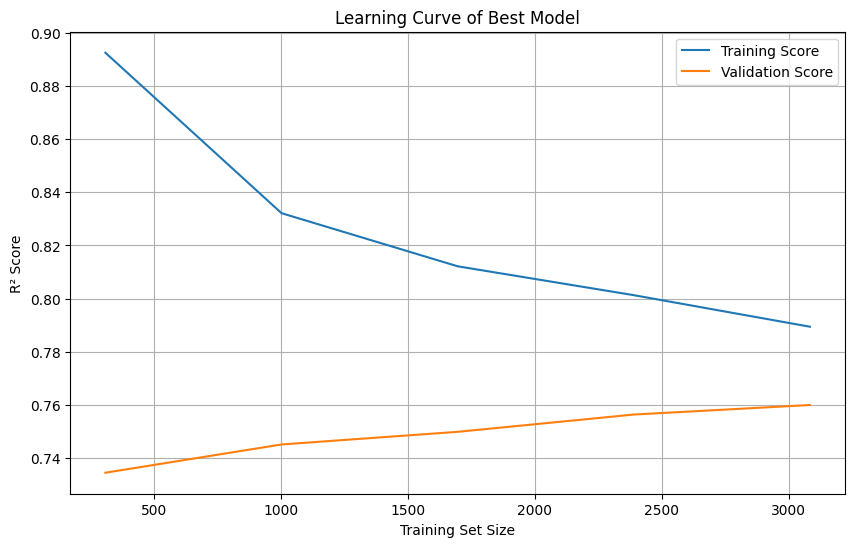

In [170]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=grad_tuned,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.title("Learning Curve of Best Model")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

- Overall, **model is decently generalized**. Validation score steadily increasing while training score decreasing.
- Model would benefit from **larger training data**. Our data is already split 80/20, so to increase generalization, **model needs more data**.

### **Model Evaluation**

Perform residual analysis and interpretable model.

#### **Residual Analysis**

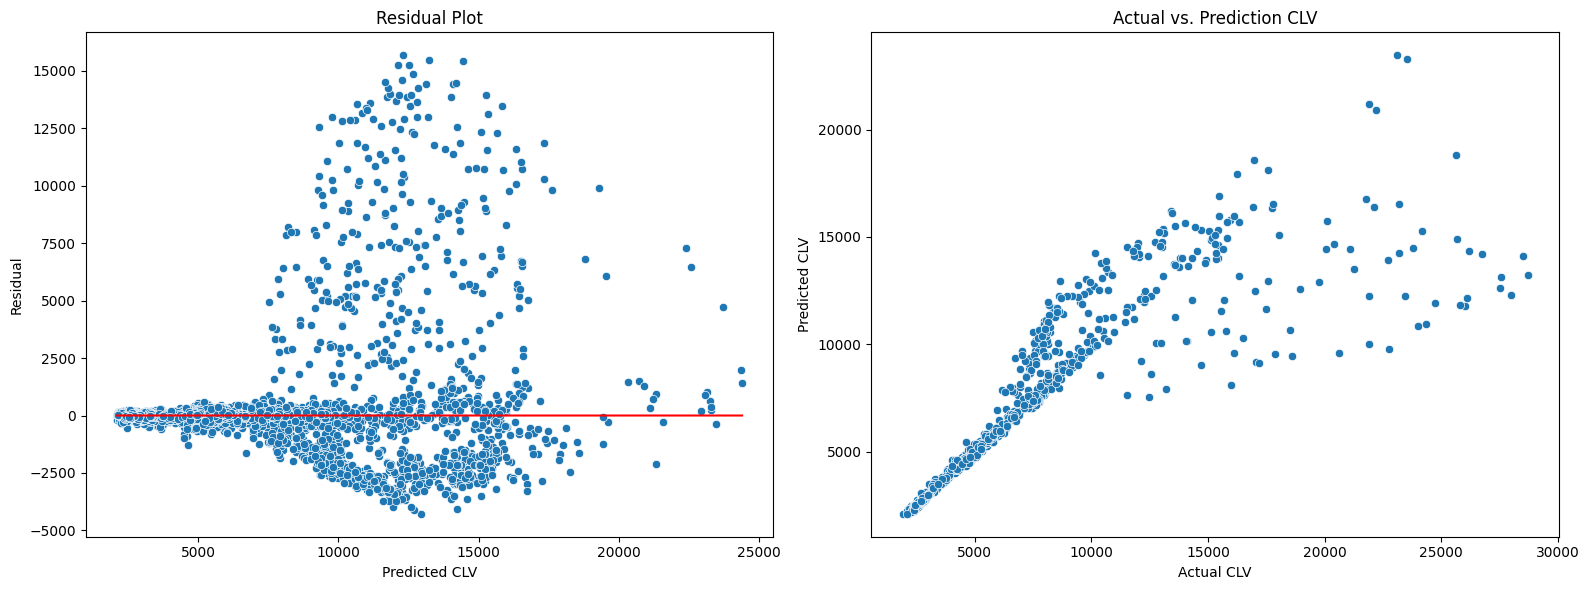

In [154]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_grad_tuned).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout()

- Model is able to accurately predict CLV up **until ~ US$10000** before the residual variance gets very unstable (Underprediction up to US$4500 and overprediction up to US$15000)
- **After around the upper boundary** of our CLV data (US$16624.75), the model **can no longer reliably perform** CLV prediction.

**Model is most accurate (low variance, minimum outlier) when predicting CLV at roughly less than US$7500.**

#### **Interpretable Model (SHAP)**
Use Shapley Value of Explanation to interpret the most significant features in our data.

In [159]:
grad_model = grad_tuned.named_steps['modeling'].regressor_

X_train_encoded = grad_tuned.named_steps['preprocessing'].transform(X_train)

feature_names = []
for name, transformer, cols in grad_tuned.named_steps['preprocessing'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

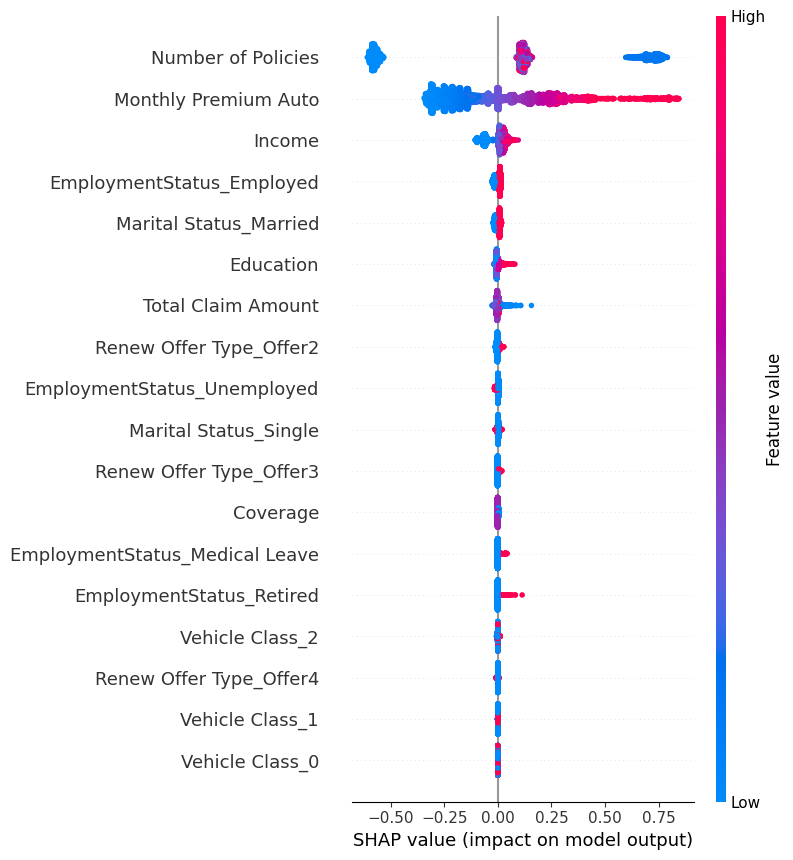

In [173]:
explainer = shap.TreeExplainer(grad_model)
shap_values = explainer.shap_values(X_train_encoded)
shap.summary_plot(shap_values, X_train_encoded, feature_names=feature_names)

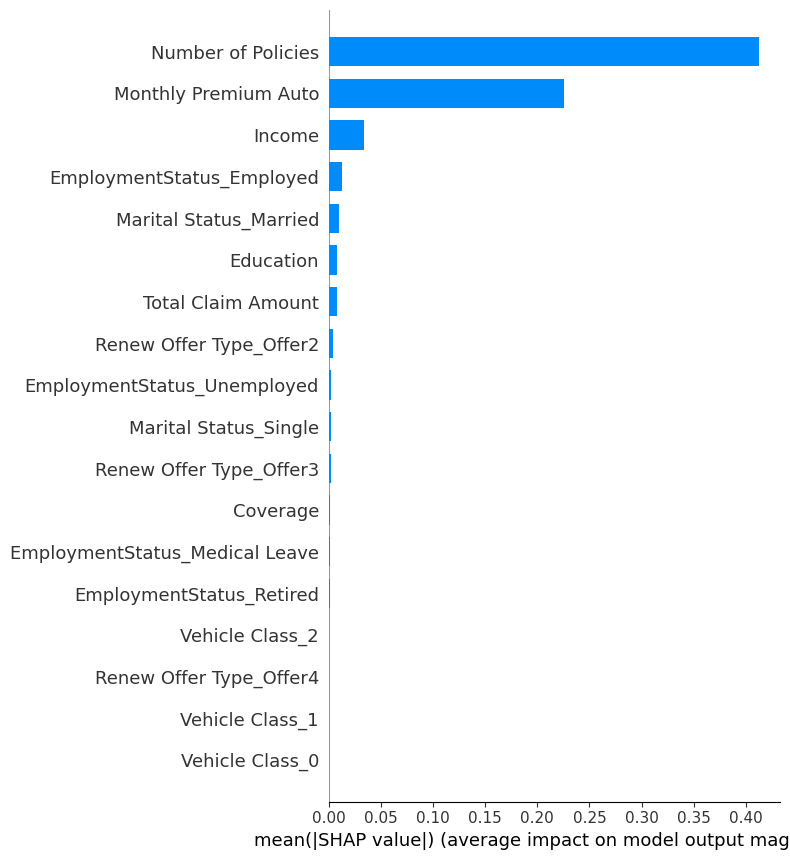

In [174]:
shap.summary_plot(shap_values, X_train_encoded, feature_names=feature_names, plot_type="bar", show=True)

- According to the SHAP graph above, **Number of policies are the most important feature** that affects CLV value. However this interpretation can be unreliable, since "Number of Policies" feature is skewed greatly towards 2. From domain knowledge, **this feature does affect a Customer's value, though not to this extent.**
- Monthly Premium Auto follows as the second most important feature. This feature makes sense, premiums are indeed **the main way auto insurance companies make their revenue.**
- Followed by Income, Employment Status = Employed, Marital Status = Married, and Education. A **customer that are wealthier, with high-achieving careers and multiple responsibilities** generally have a higher CLV.

## **Conclusion & Recommendations**

### **Conclusion**
1. An accurate machine learning model was **successfully developed**. A tuned Gradient Boosing model trained on the data was able to predict the Customer Lifetime Value with great accuracy and time **(R^2: 75.46%, MAPE: 7.841%, Time: 0.02s)**. The hyperparameters used in the model are as follows:

    | Hyperparameter                      | Best Value |
    |------------------------------------|-------------|
    | modeling__regressor__subsample        | 0.6         |
    | modeling__regressor__n_estimators     | 100         |
    | modeling__regressor__min_samples_split| 2          |
    | modeling__regressor__min_samples_leaf | 5           |
    | modeling__regressor__max_depth        | 3           |
    | modeling__regressor__learning_rate    | 0.1      |


2. According to SHAP the most significant features that affect CLV are:
    - **Number of Policy**
    - **Monthly Premium Auto**
    - **Income**

    Indicating customers with multiple insurance products, higher premiums, and higher incomes tend to have significantly higher lifetime value. A strong positive relationship is found between **customer financial strength** (income), **product engagement** (number of policies), and CLV.

### **Recommendation**
#### For further CLV modeling:
- **Data:** Collect larger datasets. This model would have a higher accuracy and be better generalized if it has more training data. Training it on larger datasets are recommended.
- **Data:** Collect customer tenure data to identify customer retention. This unlocks a Lot of different optimization, modeling, and analysis opportunities.
- **Data:** Collect claim frequency, claim severity category, and acquisition cost data. These features can significantly improve CLV modeling performane and expand modeling opportunities.
- Train with more high-value customer datasets, since they are severely underrepresented. Model performs poorly at CLV above US$7500 and almost completely unreliable above US$16624.75.
- Performing binning on the CLV data. Further analysis and modeling can be performed to customers with US$0 CLV and ultra-valuable customers at CLV of more than US$30000.

#### For Business/Marketing Team:
- Dedicate more marketing budget for high-value customer's retention strategies. High-CLV customer with long tenure will generate more revenue.
- Identify low-value segments to avoid overspending the marketing budget. 
- Promote policy bundling (vehicle + home + life insurance) to customers. Sales team can target high income, low-policy individuals and offer them discount for maximum return.
- Develop a "Claim Reduction Strategy" to reduce claims and maximize CLV.
- Assign the analytics team to develop an unsupervised model to segment customers based on their predicted CLV to better target marketing strategies to specific segments.

### Model Limitation
- Model only predicts customers with annual income of < US$100000, and Monthly Premium auto < US$224.42
- Model only accurately predicts when CLV < US$7500, above US$16624.75 it is completely unreliable.



### **Save Model**

In [176]:
#SELECT BEST MODEL
grad_tuned

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [177]:
#Fit
grad_tuned.fit(X,y) 

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [178]:
pickle.dump(grad_tuned, open("clv_prediction_model.sav", 'wb'))
print("Model saved.")

Model saved.


In [179]:
#Load model
model_loaded = pickle.load(open("clv_prediction_model.sav", 'rb'))